# PROGETTO: Web Scraping - Immobiliare.it

L'obiettivo di questo progetto è ottenere un'estrazione dei dati degli annunci presenti sul sito Immobiliare.it (https://www.immobiliare.it/), tramite la costruzione di una script che consenta di fare Web Scraping. Infine, dopo una fase di data cleaning e data exploration, costruire un modello di ML che consente di prevedere il prezzo di vendita/affitto degli immobili.

-----

Import Librerie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

## DATA SCRAPING

### Estrazione dati

Per l'estazione dei dati degli annunci dal sito web, ho creato uno script che contiene le seguenti funzioni: 
1) una prima funzione (scraping_zone_immobiliare) che ritorna una lista che comprende tutte le zone di una città;
2) una seconda funzione (scraping_immobiliare) che ritorna un dataframe in base alla città ed una singola zona;
3) una terza fuzione (city_dataframe) che, utilizzando in combinazione le precedenti, ritorna un unico dataframe con i dati di tutti gli annunci relativi ad una città.

Pertanto, dopo aver importato il suddetto script, sarà sufficente utilizzare direttamente la terza funzione (city_dataframe), la quale richiede come argomenti la città ed il tipo di annuncio (affitto/vendita).

In [2]:
#importo le funzioni contenute nello script

from function import scraping

In [3]:
#creo il df utilizzando la funzione importata

df_immobiliare_raw = scraping.city_dataframe('napoli', 'vendita')

In [4]:
df_immobiliare_raw

,title,città,zona,prezzo,superfice,piani,locali,bagni
0,Appartamento piazza San Maria degli Angeli Piz...,napoli,Chiaia,€ 1.400.000,284m²,1,5+,3+
1,"Appartamento via Santa Teresa a Chiaia, Chiaia...",napoli,Chiaia,€ 2.400.000,330m²,T,5+,3+
2,"Appartamento viale Nicola Fornelli 14, Chiaia,...",napoli,Chiaia,€ 1.100.000,230m²,R,5+,3
3,"Appartamento da ristrutturare, quinto piano, C...",napoli,Chiaia,€ 1.450.000,270m²,5,5+,3
4,"Trilocale largo Ferrandina 7, Chiaia, Napoli",napoli,Chiaia,€ 880.000,110m²,1,3,2
...,...,...,...,...,...,...,...,...
4392,"Terratetto unifamiliare via marechiaro 26, Mar...",napoli,Marechiaro,€ 2.600.000,480m²,None,5+,3
4393,"Villa unifamiliare via Marechiaro, Marechiaro,...",napoli,Marechiaro,€ 1.700.000,357m²,None,5+,3+
4394,"Villa unifamiliare discesa Gaiola San c, Marec...",napoli,Marechiaro,€ 2.300.000,400m²,None,5+,3+
4395,"Appartamento in villa via Marechiaro, Marechia...",napoli,Marechiaro,€ 2.700.000,370m²,None,5+,3+


## DATA CLEANING & DATA EXPLORATION

### DATA CLEANING

In [5]:
df_immobiliare_clean = df_immobiliare_raw.copy()

In [6]:
df_immobiliare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4397 entries, 0 to 4396
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4397 non-null   object
 1   città      4397 non-null   object
 2   zona       4397 non-null   object
 3   prezzo     4265 non-null   object
 4   superfice  4394 non-null   object
 5   piani      4053 non-null   object
 6   locali     4332 non-null   object
 7   bagni      3936 non-null   object
dtypes: object(8)
memory usage: 274.9+ KB


In [7]:
#controllo i valori univoci nelle ultime tre colonne
for i in df_immobiliare_clean.columns[-3:]:
    print(i, " :", df_immobiliare_clean[i].unique())

piani  : ['1' 'T' 'R' '5' '3' None '2' '4 - 5' '4' '6' 'S' '8' '7' '9' '5 - 6'
 '1 - 3' '2 - 3' '3 - 4' '10' 'S2' '1 - 2' 'S4' '13' '11' '11+' 'S3' '14']
locali  : ['5+' '3' '4' '5' '2' '1' None]
bagni  : ['3+' '3' '2' '1' None]


In [8]:
#controllo i valori univoci nelle colonna prezzo
print("prezzo :", df_immobiliare_clean.prezzo.unique())

prezzo : ['€ 1.400.000' '€ 2.400.000' '€ 1.100.000' '€ 1.450.000' '€ 880.000'
 '€ 900.000' '€ 500.000' '€ 560.000' '€ 280.000' None '€ 380.000'
 '€ 600.000' '€ 2.200.000' '€ 135.000' '€ 785.000' '€ 700.000'
 '€ 2.600.000' '€ 685.000' '€ 350.000' '€ 1.881.295' '€ 275.000'
 '€ 995.000' '€ 320.000' '€ 470.000' '€ 170.000' '€ 435.000' '€ 1.080.000'
 '€ 355.000' '€ 450.000' 'da € 696.000,00' '€ 190.000' '€ 550.000'
 '€ 760.000' '€ 540.000' '€ 270.000' '€ 95.000' '€ 335.000' '€ 520.000'
 '€ 360.000' '€ 1.350.000' '€ 720.000' '€ 815.000' '€ 189.000' '€ 155.000'
 '€ 395.000' '€ 180.000' '€ 990.000' 'da € 71.025,00' '€ 780.000'
 '€ 145.000' 'da € 928.000,00' '€ 1.700.000' '€ 68.000' '€ 230.000'
 '€ 1.260.000' '€ 215.000' '€ 42.000' '€ 130.000' '€ 490.000'
 '€ 3.200.000' '€ 950.000' '€ 220.000' '€ 680.000' '€ 2.300.000'
 '€ 295.000' '€ 345.000' '€ 149.000' '€ 1.200.000' '€ 615.000' '€ 28.000'
 '€ 160.000' '€ 795.000' '€ 65.000' '€ 890.000' '€ 415.000' '€ 420.000'
 '€ 2.750.000' '€ 2.800.000' '€ 

In [9]:
#controllo le righe dove la colonna superfice ha valore None
df_immobiliare_clean[df_immobiliare_clean['superfice'].isnull()]

,title,città,zona,prezzo,superfice,piani,locali,bagni
1928,"Appartamento terzo piano, Ponticelli, Napoli",napoli,Ponticelli,€ 159.000,None,3,5+,None
2227,"Bilocale via umbria, Secondigliano, Napoli",napoli,Secondigliano,€ 135.000,None,2,2,None
2246,"Bilocale da ristrutturare, quinto piano, Secon...",napoli,Secondigliano,€ 116.000,None,None,2,1


Da quanto sopra emerge che bisogna: 

- Pulire i dati nelle colonne prezzo e superfice:
  - eliminare i simboli (€, m²), gli spazi, i punti;
  - mantenere solo il valore scontato ove presente;
  - sostituire i prezzi d'asta con il prezzo media della zona;

- Sostituire i None nella colonne prezzo e superfice (con la media della zona);

- Modificare il data type delle colonne prezzo e superficie;

- Pulire i dati nelle colonne superfice, bagni, locali:
  - eliminare le righe dove abbiamo valori None;
  - modificare il data type delle colonne'

In [10]:
#definisco una funzione per sostituire elementi all'interno dei valori di una colonna
def clean_function(col, find, replace): 
    return col.str.replace(find, replace, regex=False)

#### 1.Pulisco i valori nelle colonne prezzo e superficie

In [11]:
#Elimino '€', e 'm²' nei valori della colonna 'prezzo' e 'superficie
df_immobiliare_clean['prezzo'] = clean_function(df_immobiliare_clean['prezzo'],'€', '')
df_immobiliare_clean['superfice'] = clean_function(df_immobiliare_clean['superfice'],'m²', '')

#rinomino le colonne indicando l'unità di misura
df_immobiliare_clean = df_immobiliare_clean.rename(columns={'prezzo':'prezzo(€)','superfice':'superficie(m²)'})

In [12]:
#lista degli indici delle righe con il prezzo d'asta
index_prezzo_aste = df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].str.contains('da')==True].index

#sostituisco i prezzi d'asta con none, per poi dopo sostituirli con la media della zona
df_immobiliare_clean.loc[index_prezzo_aste, 'prezzo(€)'] = None

In [13]:
#lista degli indici delle righe con il prezzo scontato
index_prezzo_discount = df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].str.contains('%')==True].index

#sostituisco i prezzi scontati con il solo prezzo scontato
for i in list(range(0,len(index_prezzo_discount))):
    df_immobiliare_clean.loc[index_prezzo_discount[i], 'prezzo(€)'] = df_immobiliare_clean.loc[index_prezzo_discount[i], 'prezzo(€)'].split()[0]

In [14]:
#Elimino '.' nella colonna 'prezzo'
df_immobiliare_clean['prezzo(€)'] = clean_function(df_immobiliare_clean['prezzo(€)'],'.', '')

#Elimino '.' nella colonna 'superifice'
df_immobiliare_clean['superficie(m²)'] = clean_function(df_immobiliare_clean['superficie(m²)'],'.', '')


#### 2.Sostituisco i valori None con la media della zona per il prezzo e le superficie

In [15]:
#Converto in int i valori non null nella colonna prezzo
df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].notnull()]['prezzo(€)'].index, 'prezzo(€)'] = df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].notnull()]['prezzo(€)'].index, 'prezzo(€)'].astype('int')

#sostituisco i valori None nella colonna prezzo con la media di ogni zona
zone_unique = df_immobiliare_clean.zona.unique()

for c in zone_unique:
    m = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['prezzo(€)'].notnull())]['prezzo(€)'].mean()
    i = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['prezzo(€)'].isnull())]['prezzo(€)'].index
    df_immobiliare_clean.loc[i,'prezzo(€)'] = df_immobiliare_clean.loc[i,'prezzo(€)'].fillna(m)

#verifico che non ci siano null
df_immobiliare_clean[df_immobiliare_clean['prezzo(€)'].isnull()]


,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni


In [16]:
#Converto in int i valori non null nella colonna superfice
df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['superficie(m²)'].notnull()]['superficie(m²)'].index, 'superficie(m²)'] = df_immobiliare_clean.loc[df_immobiliare_clean[df_immobiliare_clean['superficie(m²)'].notnull()]['superficie(m²)'].index, 'superficie(m²)'].astype('int')

#sostituisco i null nella colonna superfcie con la media di ogni zona
for c in zone_unique:
    m = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['superficie(m²)'].notnull())]['superficie(m²)'].mean()
    i = df_immobiliare_clean[(df_immobiliare_clean['zona']==c) & (df_immobiliare_clean['superficie(m²)'].isnull())]['superficie(m²)'].index
    df_immobiliare_clean.loc[i,'superficie(m²)'] = df_immobiliare_clean.loc[i,'superficie(m²)'].fillna(m)

#verifico che non ci siano null
df_immobiliare_clean[df_immobiliare_clean['superficie(m²)'].isnull()]

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni


#### 3.Converto in 'int' i valori delle colonne prezzo e superficie

In [17]:
df_immobiliare_clean['superficie(m²)'] = df_immobiliare_clean['superficie(m²)'].astype('int')
df_immobiliare_clean['prezzo(€)'] = df_immobiliare_clean['prezzo(€)'].astype('int')

#### 4.Pulisco i valori nelle colonne bagni, locali, piani

In [18]:
#Elimino le righe dove vi è almeno un valore nullo nelle colonne bagni, locali, piani
df_immobiliare_clean = df_immobiliare_clean.dropna(subset=['piani', 'locali', 'bagni'])

In [19]:
df_immobiliare_clean['bagni'].unique()

array(['3+', '3', '2', '1'], dtype=object)

In [20]:
#Sostituisco '3+' con '4', infine converto in 'int'
df_immobiliare_clean['bagni'] = clean_function(df_immobiliare_clean['bagni'],'3+', '4')
df_immobiliare_clean['bagni'] = df_immobiliare_clean['bagni'].astype('int')

In [21]:
df_immobiliare_clean['locali'].unique()

array(['5+', '3', '4', '2', '1', '5'], dtype=object)

In [22]:
#Sostituisco '5+' con '6' e 'None' con zero, infine converto in 'int'
df_immobiliare_clean['locali'] = clean_function(df_immobiliare_clean['locali'],'5+', '6')
df_immobiliare_clean['locali'] = df_immobiliare_clean['locali'].astype('int')

In [23]:
df_immobiliare_clean['piani'].unique()

array(['1', 'T', 'R', '5', '3', '2', '4 - 5', '4', '6', 'S', '8', '7',
       '9', '5 - 6', '1 - 3', '3 - 4', '10', '2 - 3', 'S2', '1 - 2', 'S4',
       '13', '11', '11+', 'S3', '14'], dtype=object)

In [24]:
#con il fine di avere i valori dei piani rappresentativi di una scala matematica che va dal più basso al più alto, sostiusco i valori come segue:

#Sostituisco 'T' con '0'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'T', '0')
#Sostituisco 'R' con '0.1'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'R', '0.1')
#Sostituisco 'S2' con '-2'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S2', '-2')
#Sostituisco 'S3' con '-3'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S3', '-3')
#Sostituisco 'S4' con '-4'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S4', '-4')
#Sostituisco 'S' con '-1'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'S', '-1')      #da inserire dopo gli altri S
#Sostituisco '1 - 2' con '1.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'1 - 2', '1.5')
#Sostituisco '1 - 3' con '2'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'1 - 3', '2')
#Sostituisco '2 - 3' con '2.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'2 - 3', '2.5')
#Sostituisco '3 - 4' con '3.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'3 - 4', '3.5')
#Sostituisco '4 - 5' con '4.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'4 - 5', '4.5')
#Sostituisco '5 - 6' con '5.5'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'5 - 6', '5.5')
#Sostituisco '11+' con '12'
df_immobiliare_clean['piani'] = clean_function(df_immobiliare_clean['piani'],'11+', '12')
#Infine converto in 'float'
df_immobiliare_clean['piani'] = df_immobiliare_clean['piani'].astype('float')

In [25]:
df_immobiliare_clean = df_immobiliare_clean.reset_index(drop=True)

In [26]:
df_immobiliare = df_immobiliare_clean.copy()

### DATA EXPLORATION

#### Info generali

In [27]:
df_immobiliare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3643 non-null   object 
 1   città           3643 non-null   object 
 2   zona            3643 non-null   object 
 3   prezzo(€)       3643 non-null   int32  
 4   superficie(m²)  3643 non-null   int32  
 5   piani           3643 non-null   float64
 6   locali          3643 non-null   int32  
 7   bagni           3643 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 170.9+ KB


In [28]:
df_immobiliare.describe()

,prezzo(€),superficie(m²),piani,locali,bagni
count,3.643000e+03,3643.000000,3643.00000,3643.000000,3643.000000
mean,3.357785e+05,142.415866,2.33165,3.465550,1.526764
std,3.465123e+05,1994.822652,2.05437,1.303738,0.687645
min,1.200000e+03,1.000000,-4.00000,1.000000,1.000000
25%,1.480000e+05,70.000000,1.00000,3.000000,1.000000
50%,2.400000e+05,95.000000,2.00000,3.000000,1.000000
75%,3.950000e+05,130.000000,3.00000,4.000000,2.000000
max,8.500000e+06,120000.000000,14.00000,6.000000,4.000000


Notiamo che il minimo ed il massimo della varibile superfice sembrano essere anomali

#### Variabile prezzo

In [29]:
#numero di annunci per zona
df_immobiliare.groupby('zona')['prezzo(€)'].describe().sort_values(by="std", ascending=False)

,count,mean,std,min,25%,50%,75%,max
zona,,,,,,,,
Chiaia,131.0,783325.190840,965214.805588,1200.0,280000.0,500000.0,875000.0,8500000.0
Marechiaro,26.0,899961.538462,562647.348222,165000.0,390000.0,837500.0,1237250.0,1900000.0
Posillipo,190.0,688612.242105,494636.622042,65000.0,300000.0,615000.0,877500.0,2900000.0
Vomero,207.0,569461.739130,384952.985625,69000.0,350000.0,500000.0,690000.0,3000000.0
Mergellina,352.0,619023.727273,324747.904408,115000.0,450000.0,550000.0,750000.0,1350000.0
Museo,49.0,320467.673469,302987.080525,33000.0,100000.0,230000.0,450000.0,1620000.0
Centro,221.0,277936.316742,233693.409784,35000.0,130000.0,215000.0,340000.0,1600000.0
Arenella,227.0,411940.030837,182429.517132,59000.0,295000.0,390000.0,490000.0,1150000.0
Traiano,48.0,214656.250000,138552.438658,80000.0,145500.0,192500.0,240000.0,950000.0


Notiamo che nelle zone dove gli immobili hanno un valore più alto, vi è una forte deviazione standard. La mediana sembra essere più rappresentativa del valore del prezzo.

#### Variabile superfice

In [30]:
#numero di annunci per zona
df_immobiliare.groupby('zona')['superficie(m²)'].describe().sort_values(by="min", ascending=False)

,count,mean,std,min,25%,50%,75%,max
zona,,,,,,,,
Scampia,44.0,117.522727,37.789188,57.0,94.50,114.5,130.00,240.0
Mergellina,352.0,125.818182,46.921052,50.0,85.00,122.5,160.00,197.0
Marechiaro,26.0,167.615385,129.911378,45.0,81.00,135.0,205.50,675.0
Piscinola,75.0,95.533333,37.660766,40.0,70.00,90.0,112.50,250.0
Barra,82.0,92.268293,58.185113,35.0,65.00,80.0,97.75,450.0
Camaldoli,31.0,367.161290,1509.907659,35.0,70.00,90.0,116.50,8500.0
Posillipo,190.0,134.610526,66.510817,30.0,87.75,120.0,164.00,395.0
Poggioreale,46.0,84.304348,30.540952,30.0,65.75,74.0,105.00,190.0
Arenella,227.0,107.788546,37.828084,30.0,80.00,105.0,135.00,220.0


In [31]:
#verifichiamo la zona Capodichino che sembra avere un minimo ed un massimo anomali

df_immobiliare[df_immobiliare['zona']=='Capodichino'].sort_values(by="superficie(m²)", ascending=False)

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni
1955,"Trilocale Strada Comunale dei Cavoni 6, Capodi...",napoli,Capodichino,190000,120000,0.1,3,1
1862,"Attico via dello Sputnik, Capodichino, Napoli",napoli,Capodichino,330000,385,3.5,4,1
1938,"Palazzo - Edificio via della Mongolfiera, Capo...",napoli,Capodichino,183773,260,1.0,6,2
1901,"Bilocale via Nuovo Tempio 67, Capodichino, Napoli",napoli,Capodichino,145000,215,0.0,2,1
1866,"Quadrilocale via Filippo Maria Briganti 324, C...",napoli,Capodichino,164000,215,0.0,4,2
...,...,...,...,...,...,...,...,...
1911,"Bilocale via Francesco De Pinedo 15, Secondigl...",napoli,Capodichino,41900,32,0.0,2,1
1891,"Monolocale Sanda Provinciale di Caserta 177, S...",napoli,Capodichino,35000,30,0.0,1,1
1900,"Monolocale via Francesco Aggello, Capodichino,...",napoli,Capodichino,37500,30,0.0,1,1
1909,"Monolocale Strada Provinciale di Caserta, Capo...",napoli,Capodichino,25000,25,0.0,1,1


In [32]:
#verifichiamo la zona Camaldoli che sembra avere un massimo anomalo

df_immobiliare[df_immobiliare['zona']=='Camaldoli'].sort_values(by="superficie(m²)", ascending=False).head()

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni
846,"Palazzo - Edificio via dell'Eremo 81, Camaldol...",napoli,Camaldoli,310822,8500,1.0,6,4
841,"Appartamento via Camaldolilli, Camaldoli, Napoli",napoli,Camaldoli,570000,190,1.0,5,3
832,"Quadrilocale via Vicinale Agnolella 2, Camaldo...",napoli,Camaldoli,560000,190,1.0,4,3
853,"Appartamento via Vicinale Reggente 41, Camaldo...",napoli,Camaldoli,273975,164,1.0,6,2
852,"Appartamento via Vicinale Reggente 41, Camaldo...",napoli,Camaldoli,257250,153,0.0,6,2


Notiamo che nelle zona di Capodino vi è una forte varianza, infatti il minimo ed il massimo sembrano essere dei valori anomali.
Inoltre, sembrano esserci dei valori anomali osservando i minimi (inferiori a 3 metri quadri) nelle zone di Capodichino, Fuorigrotta e Ponticelli.
Per la zona Camaldoli notiamo un immobile che sembra anomalo (un prezzo insolitamente basso considerando il valore la superfice di 8500m²).


Anche in questo caso la mediana sembra essere più rappresentativa del valore del superfice.

#### Verifica e rimozione valori anomali

Osserviamo la distribuzione delle variabili prezzo e superfice tramite boxpolt in base alle zone per individuare i valori anomali

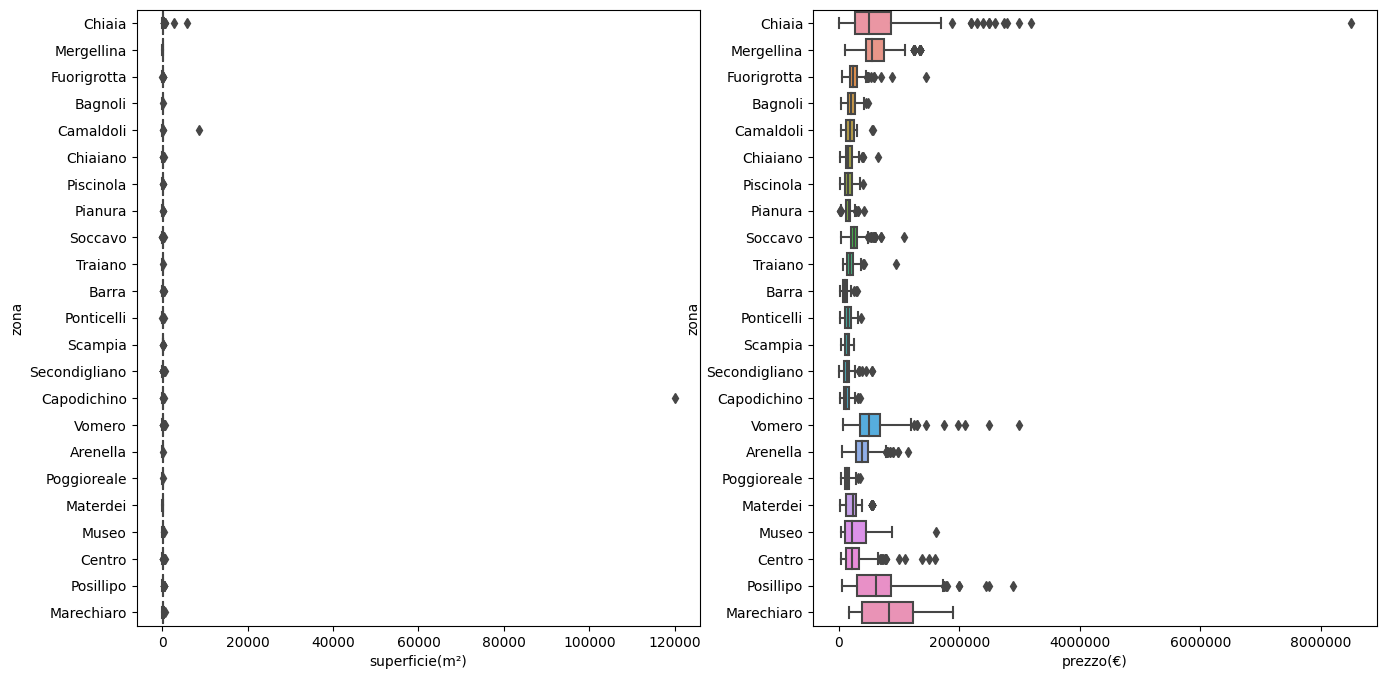

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(y='zona', x='superficie(m²)', data=df_immobiliare, ax=axs[0])
sns.boxplot(y='zona', x='prezzo(€)', data=df_immobiliare, ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='x')
plt.show()

Eliminiamo i valori anomali così inviduati: superfice superiore a 400 metri quadri e prezzo superiore ai 2.000.000 euro.

In [34]:
df_immobiliare = df_immobiliare[df_immobiliare['prezzo(€)']<3500000]
df_immobiliare = df_immobiliare[df_immobiliare['superficie(m²)']<400]
df_immobiliare = df_immobiliare.reset_index(drop=True)

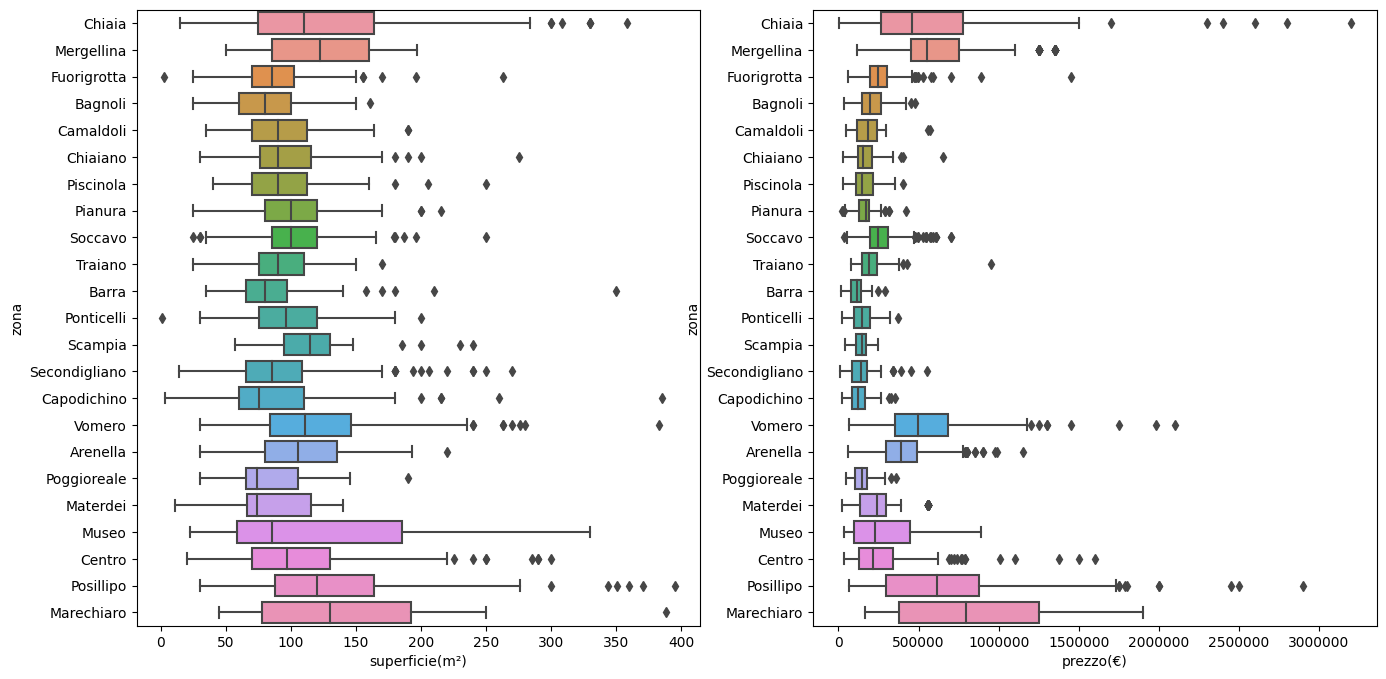

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(y='zona', x='superficie(m²)', data=df_immobiliare, ax=axs[0])
sns.boxplot(y='zona', x='prezzo(€)', data=df_immobiliare, ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='x')
plt.show()

In [36]:
df_immobiliare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3615 non-null   object 
 1   città           3615 non-null   object 
 2   zona            3615 non-null   object 
 3   prezzo(€)       3615 non-null   int32  
 4   superficie(m²)  3615 non-null   int32  
 5   piani           3615 non-null   float64
 6   locali          3615 non-null   int32  
 7   bagni           3615 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 169.6+ KB


#### Migliori zone per rapporto €/m²

Classifica per prezzo

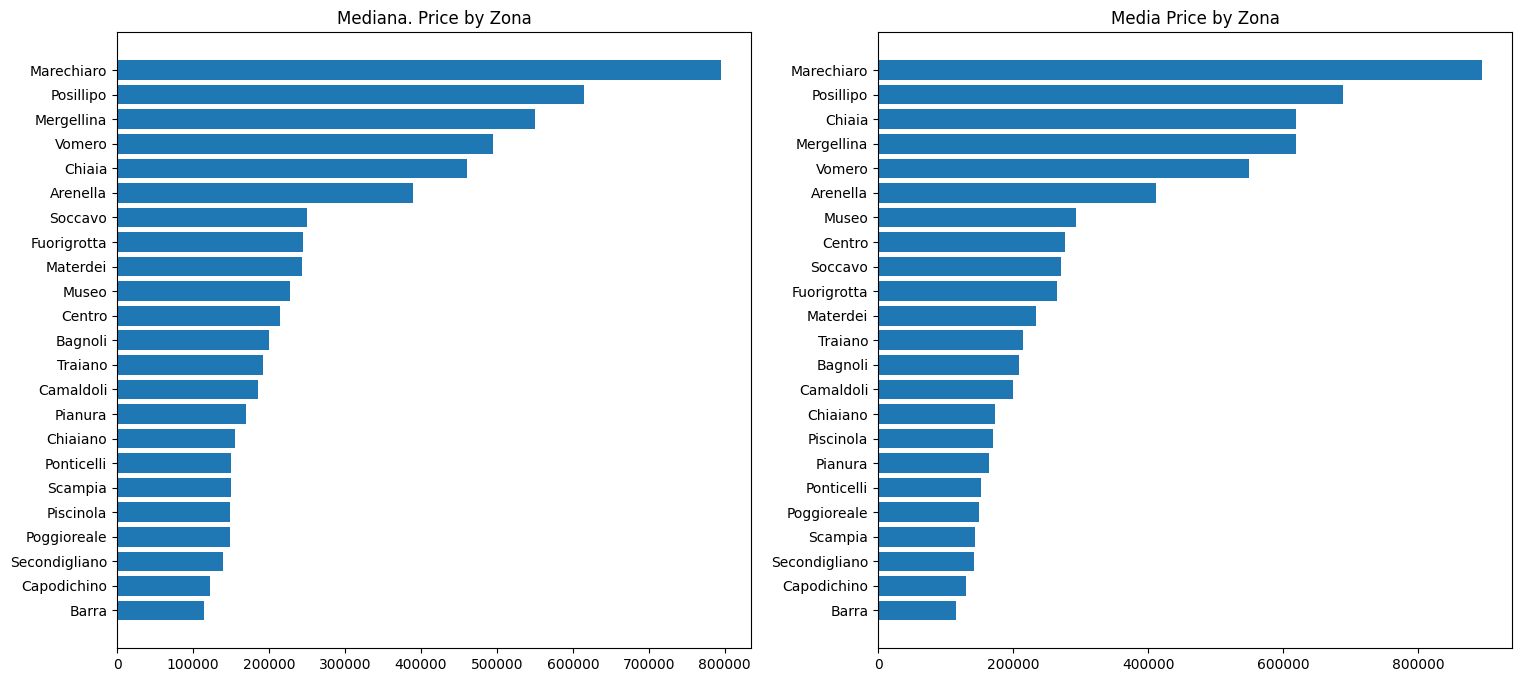

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].barh('zona', 'prezzo(€)', data=df_immobiliare.groupby('zona', as_index=False)['prezzo(€)'].median().sort_values(by='prezzo(€)', ascending=True))
axs[0].set_title('Mediana. Price by Zona')
axs[1].barh('zona', 'prezzo(€)', data=df_immobiliare.groupby('zona', as_index=False)['prezzo(€)'].mean().sort_values(by='prezzo(€)', ascending=True))
axs[1].set_title('Media Price by Zona')
plt.show()

Classifica per superfice

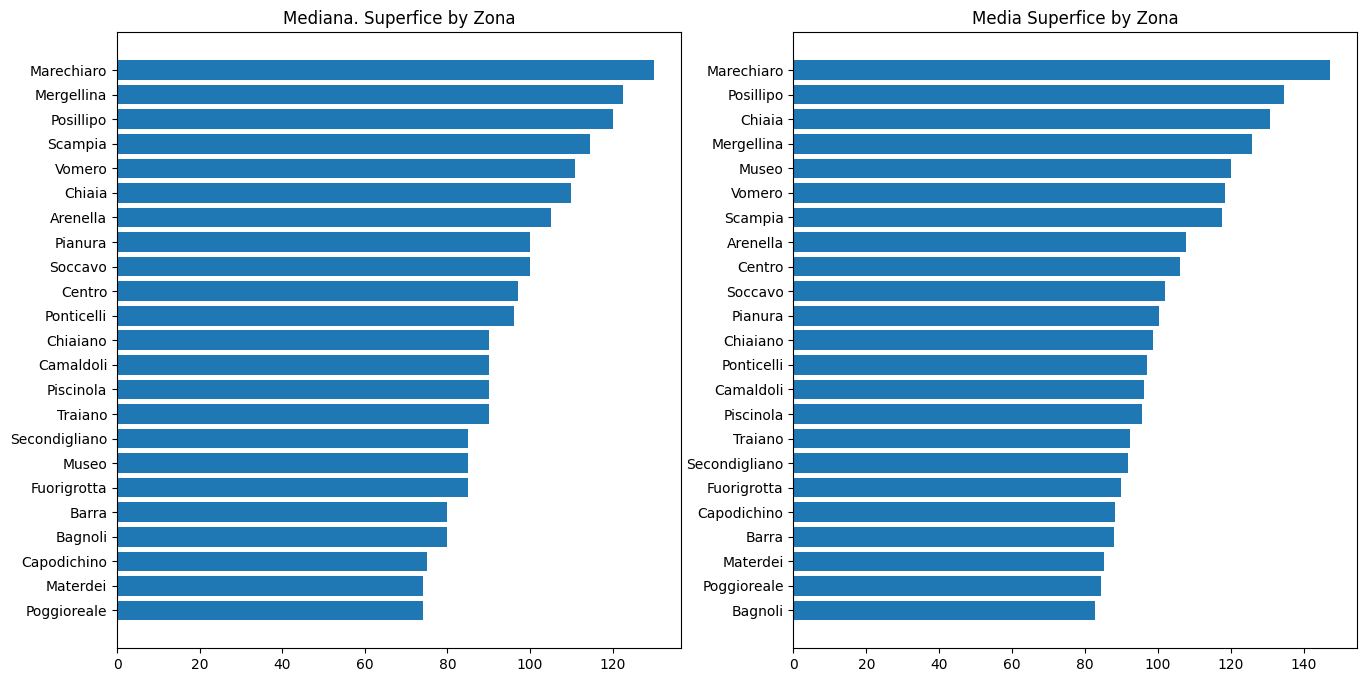

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].barh('zona', 'superficie(m²)', data=df_immobiliare.groupby('zona', as_index=False)['superficie(m²)'].median().sort_values(by='superficie(m²)', ascending=True))
axs[0].set_title('Mediana. Superfice by Zona')
axs[1].barh('zona', 'superficie(m²)', data=df_immobiliare.groupby('zona', as_index=False)['superficie(m²)'].mean().sort_values(by='superficie(m²)', ascending=True))
axs[1].set_title('Media Superfice by Zona')
plt.show()

Classifica per rapporto prezzo / superfice

In [39]:
df_immobiliare['rapporto €/m²'] = df_immobiliare['prezzo(€)']/df_immobiliare['superficie(m²)']

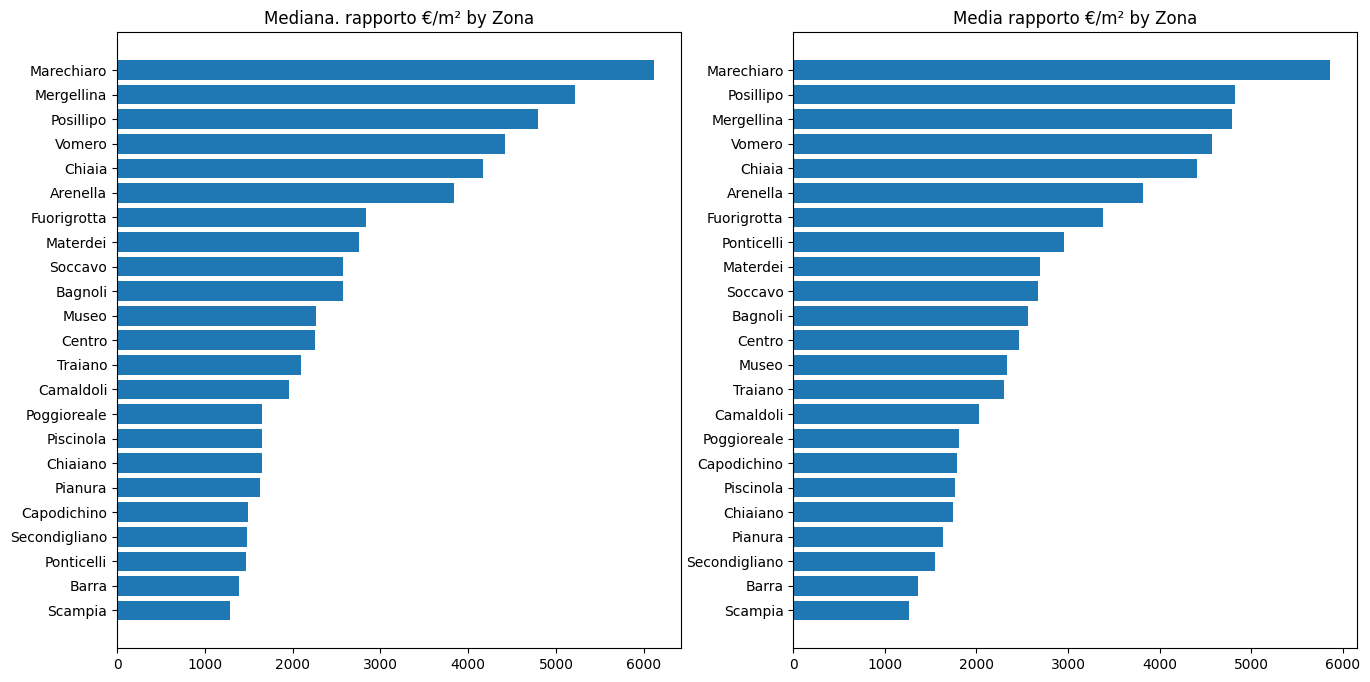

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].barh('zona', 'rapporto €/m²', data=df_immobiliare.groupby('zona', as_index=False)['rapporto €/m²'].median().sort_values(by='rapporto €/m²', ascending=True))
axs[0].set_title('Mediana. rapporto €/m² by Zona')
axs[1].barh('zona', 'rapporto €/m²', data=df_immobiliare.groupby('zona', as_index=False)['rapporto €/m²'].mean().sort_values(by='rapporto €/m²', ascending=True))
axs[1].set_title('Media rapporto €/m² by Zona')
plt.show()

## MODELLO DI REGRESSIONE LINEARE

### ANALISI CORRELLEZIONE

Si può notare una forte correlazione del prezzo con la superficie. Quest'ultima è molto correllata a sua volta con il numero di locali e di bagni, come ci si può aspettare.
Mentre il piano non sembra influire tanto sul prezzo quanto invece la superfice. 

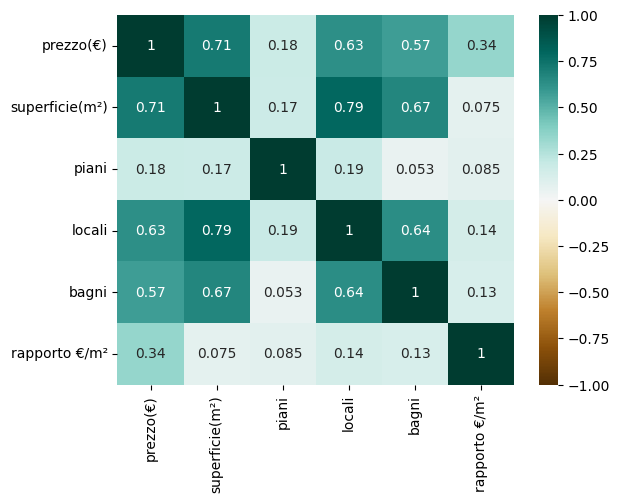

In [41]:
sns.heatmap(df_immobiliare[df_immobiliare.columns[3:]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

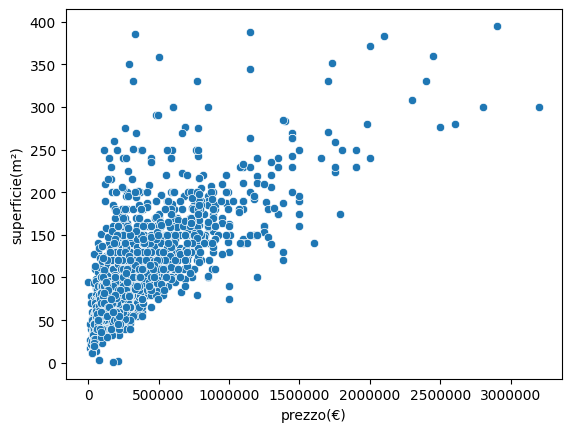

In [42]:
sns.scatterplot(data=df_immobiliare, x='prezzo(€)', y='superficie(m²)')
plt.ticklabel_format(style='plain', axis='x')

Inserendo la retta di regressione si può notare come la pendenza di questa sia influenzata dagli immobili con prezzo superiore ad 1 mln di euro, i quali risultano essere una minoranza. Osservando la distribuzione della mediana del rapporto €/m², decido di suddividere il df in 3 gruppi creando una variabile "Prestige" con le seguenti caratteristiche:
- Mediana €/m² da 0 a 2000 --> low
- Mediana €/m² da 2001 a 4000 --> medium
- Mediana €/m² da 4001 --> high

Pertanto, sarà necessario proseguire l'analisi considerando il gruppo "Prestige" a cui le zone appartengono.

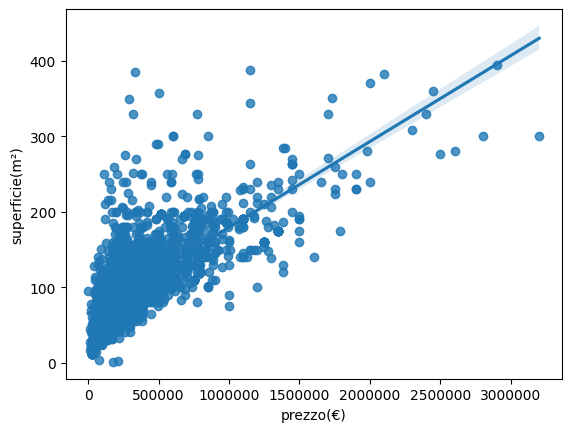

In [43]:
sns.regplot(data=df_immobiliare, x='prezzo(€)', y='superficie(m²)')
plt.ticklabel_format(style='plain', axis='x')

In [44]:
print('Immobili con prezzo superiore ad 1 mln di euro: n.'+ str(df_immobiliare[df_immobiliare['prezzo(€)']>1000000]['prezzo(€)'].count()))
print('Immobili con prezzo inferiore ad 1 mln di euro: n.'+ str(df_immobiliare[df_immobiliare['prezzo(€)']<=1000000]['prezzo(€)'].count()))

Immobili con prezzo superiore ad 1 mln di euro: n.133
Immobili con prezzo inferiore ad 1 mln di euro: n.3482


In [45]:
#creo un df dove per ogni zona calcolo la mediana del rapporto €/m² in base alla quale assegno la variabile 'prestige'
df_median_prezzo_metroq = df_immobiliare.groupby('zona', as_index=False)['rapporto €/m²'].median().sort_values(by='rapporto €/m²', ascending=True)
df_median_prezzo_metroq['prestige'] = df_median_prezzo_metroq['rapporto €/m²'].apply(lambda x: 'low' if x <= 2000 else ('medium' if x <= 4000 else 'high'))
df_median_prezzo_metroq

,zona,rapporto €/m²,prestige
18,Scampia,1288.690476,low
2,Barra,1388.888889,low
16,Ponticelli,1469.565217,low
19,Secondigliano,1477.777778,low
4,Capodichino,1488.095238,low
13,Pianura,1633.663366,low
7,Chiaiano,1647.058824,low
14,Piscinola,1648.728814,low
15,Poggioreale,1653.333333,low
3,Camaldoli,1958.333333,low


In [46]:
#aggiungo al df_immobilare la variabile 'prestige'
df_immobiliare = df_immobiliare.merge(df_median_prezzo_metroq[['zona', 'prestige']], how='left', left_on='zona', right_on='zona')

In [47]:
df_immobiliare

,title,città,zona,prezzo(€),superficie(m²),piani,locali,bagni,rapporto €/m²,prestige
0,Appartamento piazza San Maria degli Angeli Piz...,napoli,Chiaia,1400000,284,1.0,6,4,4929.577465,high
1,"Appartamento via Santa Teresa a Chiaia, Chiaia...",napoli,Chiaia,2400000,330,0.0,6,4,7272.727273,high
2,"Appartamento viale Nicola Fornelli 14, Chiaia,...",napoli,Chiaia,1100000,230,0.1,6,3,4782.608696,high
3,"Appartamento da ristrutturare, quinto piano, C...",napoli,Chiaia,1450000,270,5.0,6,3,5370.370370,high
4,"Trilocale largo Ferrandina 7, Chiaia, Napoli",napoli,Chiaia,880000,110,1.0,3,2,8000.000000,high
...,...,...,...,...,...,...,...,...,...,...
3610,"Appartamento via gaiola 7, Marechiaro, Napoli",napoli,Marechiaro,1080000,140,1.0,6,3,7714.285714,high
3611,"Appartamento discesa discesa gaiola n 7 7, Mar...",napoli,Marechiaro,1199000,150,1.0,6,3,7993.333333,high
3612,"Appartamento via gaiola 9, Marechiaro, Napoli",napoli,Marechiaro,1900000,250,0.0,6,3,7600.000000,high
3613,"Appartamento via via Marechiaro 21, Marechiaro...",napoli,Marechiaro,1000000,160,0.0,6,3,6250.000000,high


In [55]:
#verifichiamo la numeristà di ogni gruppo 'prestige'
df_immobiliare['prestige'].value_counts()

prestige
medium    1827
low        898
high       890
Name: count, dtype: int64

### REGRESSIONE SEMPLICE

Prevediamo il prezzo di un appartamento in base al valore della superfice per ciascun gruppo 'prestige' delle zone della città 

In [48]:
import statsmodels.api as sm

#definiamo il modello per zone low
Y_l = df_immobiliare[df_immobiliare['prestige']=='low']['prezzo(€)']
X_l = df_immobiliare[df_immobiliare['prestige']=='low']['superficie(m²)']
X_l = sm.add_constant(X_l)
model = sm.OLS(Y_l,X_l)
results_low = model.fit()

#definiamo il modello per zone medium
Y_m = df_immobiliare[df_immobiliare['prestige']=='medium']['prezzo(€)']
X_m = df_immobiliare[df_immobiliare['prestige']=='medium']['superficie(m²)']
X_m = sm.add_constant(X_m)
model = sm.OLS(Y_m,X_m)
results_medium = model.fit()

#definiamo il modello per zone high
Y_h = df_immobiliare[df_immobiliare['prestige']=='high']['prezzo(€)']
X_h = df_immobiliare[df_immobiliare['prestige']=='high']['superficie(m²)']
X_h = sm.add_constant(X_h)
model = sm.OLS(Y_h,X_h)
results_high = model.fit()

In [49]:
#previsione prezzi zone low
list_prezzi_l = []
list_metriq = [ 50, 60 , 70 , 80, 90, 100, 110, 120]
for c in list_metriq:
    list_prezzi_l.append(str(round(results_low.predict(np.array([1, c]))[0],2)))

df_prev_prezzi = pd.DataFrame({'metriq': list_metriq, 'prezzo_prev_low': list_prezzi_l})

#previsione prezzi zone medium
list_prezzi_m = []
for c in list_metriq:
    list_prezzi_m.append(str(round(results_medium.predict(np.array([1, c]))[0],2)))

#previsione prezzi zone high
list_prezzi_h = []
for c in list_metriq:
    list_prezzi_h.append(str(round(results_high.predict(np.array([1, c]))[0],2)))

df_prev_prezzi['prezzo_prev_medium'] = list_prezzi_m
df_prev_prezzi['prezzo_prev_high'] = list_prezzi_h
df_prev_prezzi

,metriq,prezzo_prev_low,prezzo_prev_medium,prezzo_prev_high
0,50,93503.54,135703.38,196547.48
1,60,106061.63,165825.06,252057.18
2,70,118619.71,195946.74,307566.87
3,80,131177.8,226068.43,363076.56
4,90,143735.88,256190.11,418586.26
5,100,156293.97,286311.8,474095.95
6,110,168852.05,316433.48,529605.64
7,120,181410.14,346555.16,585115.33
